### Importing the data and removing the null values

In [1]:
import pandas as pd 
import numpy 
numpy.__version__ 
'1.21.4'
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from linearmodels import PooledOLS

df = pd.read_csv('DiD_data.csv')
df.head()

C:\Users\grfor\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,rssd9001,rssd9999,bhc_avgtradingratio,treat_3_b_avg,after_DFA_1,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter
0,1020180,20040930,0.0,0,0,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0
1,1020180,20041231,0.0,0,0,0.003045,0.082480,15.630583,0.009732,0.456392,0.557617,0.601763,0.025446,0
2,1020180,20050331,0.0,0,0,0.002616,0.082074,15.644925,0.011830,0.444011,0.556980,0.600700,0.025153,0
3,1020180,20050630,0.0,0,0,0.002647,0.081712,15.679702,0.013654,0.433771,0.571642,0.601042,0.023670,0
4,1020180,20050930,0.0,0,0,0.002867,0.082944,15.661868,0.012456,0.400985,0.577408,0.581438,0.029793,0


In [2]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

In [210]:
df.shape

(81560, 14)

In [211]:
df.dtypes

rssd9001                   int64
rssd9999                   int64
bhc_avgtradingratio      float64
treat_3_b_avg              int64
after_DFA_1                int64
dep_roa1                 float64
dep_leverage             float64
dep_lnassets             float64
dep_creditrisk_total3    float64
dep_cir                  float64
dep_depositratio         float64
dep_loans_REratio        float64
dep_liquidity            float64
dep_cpp_bankquarter        int64
dtype: object

In [212]:
df.describe()

,rssd9001,rssd9999,bhc_avgtradingratio,treat_3_b_avg,after_DFA_1,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter
count,8.156000e+04,8.156000e+04,41442.000000,81560.000000,81560.000000,56938.000000,57017.000000,61771.000000,44432.000000,42382.000000,79172.000000,44432.000000,55159.000000,81560.000000
mean,1.803535e+06,2.009222e+07,0.002650,0.012482,0.451128,0.001844,0.093518,13.516361,0.027758,0.531455,0.681883,0.735931,0.053559,0.042398
std,8.030013e+05,3.327316e+04,0.020015,0.111022,0.497609,0.006116,0.042513,1.354361,0.033980,0.355984,0.112038,0.160457,0.051830,0.201497
min,1.020180e+06,2.004093e+07,0.000000,0.000000,0.000000,-0.387137,-0.762281,5.888878,0.000000,-12.478261,0.000000,0.000000,0.000230,0.000000
25%,1.118434e+06,2.006093e+07,0.000000,0.000000,0.000000,0.001246,0.073928,12.621573,0.009764,0.413383,0.635417,0.655918,0.024569,0.000000
50%,1.248304e+06,2.009033e+07,0.000000,0.000000,0.000000,0.002209,0.090160,13.233317,0.018046,0.502336,0.696680,0.764127,0.036075,0.000000
75%,2.537957e+06,2.012093e+07,0.000000,0.000000,1.000000,0.003119,0.108184,13.948256,0.032604,0.615253,0.750985,0.848875,0.062095,0.000000
max,3.836442e+06,2.015063e+07,0.429727,1.000000,1.000000,0.934277,1.157965,21.669949,0.734222,45.933334,0.998093,1.010109,0.843543,1.000000


note there are some missing values for some of the covariates above

Below, we drop the null values

In [213]:
df.dropna(inplace=True)

In [214]:
df.shape

(40026, 14)

### Descriptive Plots

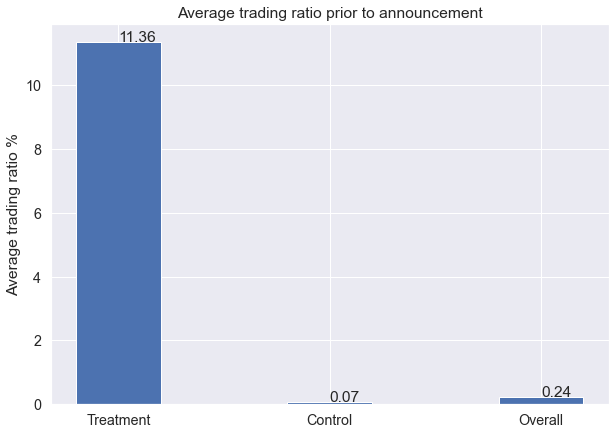

In [26]:
data = {'Treatment': round(df[(df['after_DFA_1']==0) & (df['treat_3_b_avg']==1)]['bhc_avgtradingratio'].mean()*100,2),
       'Control': round(df[(df['after_DFA_1']==0) & (df['treat_3_b_avg']==0)]['bhc_avgtradingratio'].mean()*100,2),
       'Overall':round(df[(df['after_DFA_1']==0)]['bhc_avgtradingratio'].mean()*100,2)}
labels= list(data.keys())
values = list(data.values())

#def add_value_label(x_list,y_list):
    #for i in range(1, len(x_list)+1):
        #plt.text(i,y_list[i-1],y_list[i-1])
        
def add_value_label(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

fig = plt.figure(figsize = (10, 7))
plt.bar(labels, values,
        width = 0.4)

add_value_label(labels,values)

plt.title("Average trading ratio prior to announcement")
plt.ylabel("Average trading ratio %")
plt.show()

### DiD Model

In [215]:
# Create interaction var 
df['interaction'] = df['treat_3_b_avg']*df['after_DFA_1']

data = df.set_index(["rssd9001", "rssd9999"])
data.head()

bhc_avgtradingratio  treat_3_b_avg  after_DFA_1  dep_roa1  \
rssd9001 rssd9999                                                              
1020180  20040930                  0.0              0            0  0.002772   
         20041231                  0.0              0            0  0.003045   
         20050331                  0.0              0            0  0.002616   
         20050630                  0.0              0            0  0.002647   
         20050930                  0.0              0            0  0.002867   

                   dep_leverage  dep_lnassets  dep_creditrisk_total3  \
rssd9001 rssd9999                                                      
1020180  20040930      0.081957     15.601202               0.013304   
         20041231      0.082480     15.630583               0.009732   
         20050331      0.082074     15.644925               0.011830   
         20050630      0.081712     15.679702               0.013654   
         20050930      0.082944     15.661868               0.012456   

                    dep_cir  dep_depositratio  dep_loans_REratio  \
rssd9001 rssd9999                                                  
1020180  20040930  0.463811          0.561805           0.593738   
         20041231  0.456392          0.557617           0.601763   
         20050331  0.444011          0.556980           0.600700   
         20050630  0.433771          0.571642           0.601042   
         20050930  0.400985          0.577408           0.581438   

                   dep_liquidity  dep_cpp_bankquarter  interaction  
rssd9001 rssd9999                                                   
1020180  20040930       0.024337                    0            0  
         20041231       0.025446                    0            0  
         20050331       0.025153                    0            0  
         20050630       0.023670                    0            0  
         20050930       0.029793                    0            0

In [216]:
from linearmodels import PanelOLS


#List of independent variables
list_var = ['interaction','treat_3_b_avg','after_DFA_1','dep_roa1','dep_leverage','dep_lnassets',
           'dep_cir','dep_depositratio','dep_loans_REratio','dep_liquidity','dep_cpp_bankquarter','dep_creditrisk_total3']
x_var = data[list_var]
x_var = sm.add_constant(x_var)

#dependent variable
y_var = data['bhc_avgtradingratio']


mod = PanelOLS(y_var, x_var, entity_effects=True, time_effects=True, drop_absorbed = True)
print(mod.fit(cov_type="clustered", cluster_entity=True))

                           PanelOLS Estimation Summary                           
Dep. Variable:     bhc_avgtradingratio   R-squared:                        0.0532
Estimator:                    PanelOLS   R-squared (Between):             -0.0658
No. Observations:                40026   R-squared (Within):               0.0519
Date:                 Wed, Oct 12 2022   R-squared (Overall):             -0.0771
Time:                         23:36:11   Log-likelihood                 1.519e+05
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      211.07
Entities:                         2428   P-value                           0.0000
Avg Obs:                        16.485   Distribution:                F(10,37551)
Min Obs:                        1.0000                                           
Max Obs:                        38.000   F-statistic (robust):             2.0191
                

### Using the Affect variable instead of the Affected BHC variable

we used the Affect variable which is the average trading asset ration from the third quarter fo 2004 to the second quarter of 2009 instead
of the affected BHC dummy variable

In [217]:
affect_df = df[df['after_DFA_1']==0].groupby('rssd9001')['bhc_avgtradingratio'].mean()
affect_df.rename('affect', inplace=True)

rssd9001
1020180    0.000000
1020201    0.134151
1020340    0.016581
1020395    0.000000
1020582    0.000000
             ...   
3762457    0.000000
3803033    0.000000
3821756    0.000000
3832583    0.000000
3836442    0.000000
Name: affect, Length: 2428, dtype: float64

In [218]:
df_affect = pd.merge(df, affect_df, left_on='rssd9001', right_index = True)
df_affect.head()

,rssd9001,rssd9999,bhc_avgtradingratio,treat_3_b_avg,after_DFA_1,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter,interaction,affect
0,1020180,20040930,0.0,0,0,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0,0,0.0
1,1020180,20041231,0.0,0,0,0.003045,0.082480,15.630583,0.009732,0.456392,0.557617,0.601763,0.025446,0,0,0.0
2,1020180,20050331,0.0,0,0,0.002616,0.082074,15.644925,0.011830,0.444011,0.556980,0.600700,0.025153,0,0,0.0
3,1020180,20050630,0.0,0,0,0.002647,0.081712,15.679702,0.013654,0.433771,0.571642,0.601042,0.023670,0,0,0.0
4,1020180,20050930,0.0,0,0,0.002867,0.082944,15.661868,0.012456,0.400985,0.577408,0.581438,0.029793,0,0,0.0


In [219]:
#create new interaction term 
df_affect['interaction_affect'] = df_affect['affect']*df_affect['after_DFA_1']

#Reshape data
data = df_affect.set_index(["rssd9001", "rssd9999"])
data.head()

bhc_avgtradingratio  treat_3_b_avg  after_DFA_1  dep_roa1  \
rssd9001 rssd9999                                                              
1020180  20040930                  0.0              0            0  0.002772   
         20041231                  0.0              0            0  0.003045   
         20050331                  0.0              0            0  0.002616   
         20050630                  0.0              0            0  0.002647   
         20050930                  0.0              0            0  0.002867   

                   dep_leverage  dep_lnassets  dep_creditrisk_total3  \
rssd9001 rssd9999                                                      
1020180  20040930      0.081957     15.601202               0.013304   
         20041231      0.082480     15.630583               0.009732   
         20050331      0.082074     15.644925               0.011830   
         20050630      0.081712     15.679702               0.013654   
         20050930      0.082944     15.661868               0.012456   

                    dep_cir  dep_depositratio  dep_loans_REratio  \
rssd9001 rssd9999                                                  
1020180  20040930  0.463811          0.561805           0.593738   
         20041231  0.456392          0.557617           0.601763   
         20050331  0.444011          0.556980           0.600700   
         20050630  0.433771          0.571642           0.601042   
         20050930  0.400985          0.577408           0.581438   

                   dep_liquidity  dep_cpp_bankquarter  interaction  affect  \
rssd9001 rssd9999                                                            
1020180  20040930       0.024337                    0            0     0.0   
         20041231       0.025446                    0            0     0.0   
         20050331       0.025153                    0            0     0.0   
         20050630       0.023670                    0            0     0.0   
         20050930       0.029793                    0            0     0.0   

                   interaction_affect  
rssd9001 rssd9999                      
1020180  20040930                 0.0  
         20041231                 0.0  
         20050331                 0.0  
         20050630                 0.0  
         20050930                 0.0

In [220]:
#List of independent variables
list_var = ['interaction_affect','affect','after_DFA_1','dep_roa1','dep_leverage','dep_lnassets',
           'dep_cir','dep_depositratio','dep_loans_REratio','dep_liquidity','dep_cpp_bankquarter','dep_creditrisk_total3']
x_var = data[list_var]
x_var = sm.add_constant(x_var)

#dependent variable
y_var = data['bhc_avgtradingratio']


mod = PanelOLS(y_var, x_var, entity_effects=True, time_effects=True, drop_absorbed = True)
print(mod.fit(cov_type="clustered", cluster_entity=True))

                           PanelOLS Estimation Summary                           
Dep. Variable:     bhc_avgtradingratio   R-squared:                        0.0824
Estimator:                    PanelOLS   R-squared (Between):             -0.1939
No. Observations:                40026   R-squared (Within):               0.0805
Date:                 Wed, Oct 12 2022   R-squared (Overall):             -0.2043
Time:                         23:36:12   Log-likelihood                 1.525e+05
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      337.04
Entities:                         2428   P-value                           0.0000
Avg Obs:                        16.485   Distribution:                F(10,37551)
Min Obs:                        1.0000                                           
Max Obs:                        38.000   F-statistic (robust):             4.6717
                

### Propensity Score Model

##### Obtaining the propensity scores from the logistic regression

In [221]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

In [222]:
psm = PsmPy(df, treatment='treat_3_b_avg', indx = 'rssd9001', exclude = ['bhc_avgtradingratio','after_DFA_1','rssd9999'])

In [223]:
psm.logistic_ps(balance = True)

In [224]:
psm.predicted_data

,rssd9001,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter,interaction,propensity_score,propensity_logit,treat_3_b_avg
0,1020180,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0,0,0.238120,-1.163012,0
1,1020180,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0,0,0.238120,-1.163012,0
2,1020180,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0,0,0.238120,-1.163012,0
3,1020180,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0,0,0.238120,-1.163012,0
4,1020180,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0,0,0.238120,-1.163012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40021,3217340,0.001861,0.108929,15.520899,0.004086,0.582577,0.555849,0.889308,0.020775,0,0,0.185426,-1.480007,0
40022,3262818,0.000818,0.080461,11.934775,0.001630,0.488813,0.827683,0.801602,0.028250,0,0,0.025676,-3.636191,0
40023,3340015,0.003152,0.107053,12.508161,0.012081,0.573564,0.688235,0.742108,0.051064,0,0,0.070556,-2.578176,0
40024,3390195,0.004236,0.139369,13.293773,0.013970,0.402799,0.651084,0.962879,0.011874,0,0,0.053243,-2.878182,0


In [225]:
#create a new dataframe and group by each Bank ID
df_group = psm.predicted_data.groupby('rssd9001').mean()
df_group

,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter,interaction,propensity_score,propensity_logit,treat_3_b_avg
rssd9001,,,,,,,,,,,,,
1020180,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0.0,0.0,0.238120,-1.163012,0.0
1020201,0.002906,0.070028,18.610798,0.013813,0.339097,0.390303,0.758043,0.044461,0.0,0.0,0.870887,1.908825,1.0
1020340,0.001361,0.080455,17.481033,0.018730,0.427712,0.488432,0.530362,0.060532,0.0,0.0,0.369424,-0.534690,0.0
1020395,0.003483,0.071013,12.333779,0.021799,0.372665,0.625883,0.670054,0.033630,0.0,0.0,0.074073,-2.525741,0.0
1020582,0.005129,0.128451,12.405419,0.007761,0.386555,0.648790,0.777586,0.037031,0.0,0.0,0.074185,-2.524107,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3762457,-0.000181,0.204518,15.378604,0.042796,0.636536,0.496431,0.770731,0.199174,0.0,0.0,0.291306,-0.889051,0.0
3803033,0.000000,0.096252,13.197137,0.032319,0.549166,0.735027,0.791373,0.021637,0.0,0.0,0.072907,-2.542876,0.0
3821756,0.000916,0.119017,13.408597,0.027822,0.451573,0.671120,0.847613,0.034443,0.0,0.0,0.063761,-2.686732,0.0


In [226]:
#Placing the propensity scores in the full dataframe
df = pd.merge(df, df_group[['propensity_score']], how='inner', left_on='rssd9001', right_index=True)

##### Choosing the 3 closest BHCs from the control group

In [227]:
from sklearn.neighbors import NearestNeighbors

n_neighbors = 3
knn = NearestNeighbors(n_neighbors=n_neighbors)

knn.fit(df_group[df_group['treat_3_b_avg']==0][['propensity_score']])

NearestNeighbors(n_neighbors=3)

In [228]:
len(df_group[df_group['treat_3_b_avg']==1])

30

In [229]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#create a list of indexes from the control group, based on 3 nearest neighbours of controls 
list_indexes = []
for i in range(len(df_group[df_group['treat_3_b_avg']==1])):
    for j in knn.kneighbors(df_group[df_group['treat_3_b_avg']==1]['propensity_score'].iloc[i].reshape(-1,1))[1][0]:
        list_indexes.append(j)

In [230]:
print('there are {} BHCs in the treated group, we have {} indexes of controls in the list'.format(len(df_group[df_group['treat_3_b_avg']==1]),len(list_indexes)))

there are 30 BHCs in the treated group, we have 90 indexes of controls in the list


In [231]:
#some of the banks in the control group are repeated 
from collections import Counter
Counter(list_indexes)

Counter({1437: 4,
         1563: 4,
         1340: 3,
         1193: 16,
         1586: 18,
         1973: 18,
         192: 4,
         2056: 4,
         52: 5,
         2319: 2,
         32: 1,
         806: 1,
         342: 1,
         223: 1,
         168: 1,
         1298: 1,
         969: 1,
         608: 1,
         1684: 1,
         62: 1,
         53: 1,
         2003: 1})

In [232]:
num_controls = []
for i in Counter(list_indexes):
    num_controls.append(i)
    
print('We actually have {} unique BHCs in the control group due to duplicates selected in the control group'.format(len(num_controls)))

We actually have 22 unique BHCs in the control group due to duplicates selected in the control group


In [233]:
##Creating a new dataset with the selected controls 

df_psm = df[df['treat_3_b_avg']==1]


## adding the controls

for i in Counter(list_indexes):
    for j in range(Counter(list_indexes)[i]):
        df_psm = df_psm.append(df[df['rssd9001'] == df_group[df_group['treat_3_b_avg']==0].iloc[i].name])



df_psm


,rssd9001,rssd9999,bhc_avgtradingratio,treat_3_b_avg,after_DFA_1,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter,interaction,propensity_score
38,1020201,20040930,0.126453,1,0,0.002906,0.070028,18.610798,0.013813,0.339097,0.390303,0.758043,0.044461,0,0,0.870887
39,1020201,20041231,0.139026,1,0,0.002053,0.074122,18.764626,0.014689,0.414206,0.358281,0.647956,0.042322,0,0,0.870887
40,1020201,20050331,0.130043,1,0,0.002237,0.076953,18.768549,0.015002,0.357776,0.357660,0.651144,0.045373,0,0,0.870887
41,1020201,20050630,0.131771,1,0,0.001485,0.078767,18.788057,0.015216,0.372252,0.362995,0.642943,0.046566,0,0,0.870887
42,1020201,20050930,0.135333,1,0,0.001715,0.080054,18.818710,0.016574,0.325251,0.376771,0.623793,0.042985,0,0,0.870887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34361,2868950,20131231,0.000000,0,1,0.002777,0.067493,13.888880,0.004980,0.506520,0.440028,0.422569,0.183146,0,0,0.346657
34362,2868950,20140331,0.000000,0,1,0.002278,0.066759,13.954274,0.013398,0.522319,0.446084,0.417284,0.179938,0,0,0.346657
34363,2868950,20140630,0.000000,0,1,0.002519,0.068168,13.913887,0.014213,0.527982,0.441377,0.410882,0.147529,0,0,0.346657
34364,2868950,20140930,0.000000,0,1,0.002946,0.070282,13.971097,0.009960,0.490794,0.423516,0.419649,0.140803,0,0,0.346657


In [234]:
#Treated & Controls in our PSM model
df_psm['treat_3_b_avg'].value_counts()

0    1241
1     627
Name: treat_3_b_avg, dtype: int64

### Statistics of Controls before and after Propensity Score Matching

In [235]:
list_covariates = ['dep_roa1','dep_leverage','dep_lnassets',
           'dep_cir','dep_depositratio','dep_loans_REratio','dep_liquidity','dep_cpp_bankquarter','dep_creditrisk_total3']

In [236]:
#Before matching, fixed to 2004Q3
df2 = df[df['rssd9999']==20040930]
new_dict = {}

for i in list_covariates:
    new_dict[i] = {}

for i in list_covariates:
    _, p = ttest_ind(df2[df2['treat_3_b_avg']==1][i], df2[df2['treat_3_b_avg']==0][i])
    new_dict[i]['control_mean'] = df2[df2['treat_3_b_avg']==0][i].mean()
    new_dict[i]['control_std'] = df2[df2['treat_3_b_avg']==0][i].std()
    new_dict[i]['treatment_mean'] = df2[df2['treat_3_b_avg']==1][i].mean()
    new_dict[i]['treatment_std'] = df2[df2['treat_3_b_avg']==1][i].std()
    new_dict[i]['p-value'] = p
    new_dict[i]['diff'] = (df2[df2['treat_3_b_avg']==0][i].mean() - df2[df2['treat_3_b_avg']==1][i].mean())
    
pd.DataFrame.from_dict(new_dict, orient='index').round(5)

,control_mean,control_std,treatment_mean,treatment_std,p-value,diff
dep_roa1,0.00294,0.00304,0.00309,0.00143,0.83034,-0.00015
dep_leverage,0.09373,0.03455,0.08248,0.01873,0.16909,0.01125
dep_lnassets,13.12326,1.24772,17.77273,2.84568,0.00000,-4.64947
dep_cir,0.50581,0.15133,0.47042,0.08799,0.32347,0.03539
dep_depositratio,0.66724,0.10506,0.34619,0.22092,0.00000,0.32106
dep_loans_REratio,0.69916,0.14892,0.50955,0.22470,0.00000,0.18961
dep_liquidity,0.03965,0.02831,0.04771,0.03633,0.23615,-0.00806
dep_cpp_bankquarter,0.00000,0.00000,0.00000,0.00000,NaN,0.00000
dep_creditrisk_total3,0.01770,0.01684,0.02082,0.01340,0.43433,-0.00313


In [237]:
#Before matching, fixed to 2004Q3
df3 = df_psm[df_psm['rssd9999']==20040930]
new_dict = {}

for i in list_covariates:
    new_dict[i] = {}

for i in list_covariates:
    _, p = ttest_ind(df3[df3['treat_3_b_avg']==1][i], df3[df3['treat_3_b_avg']==0][i])
    new_dict[i]['control_mean'] = df3[df3['treat_3_b_avg']==0][i].mean()
    new_dict[i]['control_std'] = df3[df3['treat_3_b_avg']==0][i].std()
    new_dict[i]['treatment_mean'] = df3[df3['treat_3_b_avg']==1][i].mean()
    new_dict[i]['treatment_std'] = df3[df3['treat_3_b_avg']==1][i].std()
    new_dict[i]['p-value'] = p
    new_dict[i]['diff'] = (df3[df3['treat_3_b_avg']==0][i].mean() - df3[df3['treat_3_b_avg']==1][i].mean())
    
pd.DataFrame.from_dict(new_dict, orient='index').round(5)

,control_mean,control_std,treatment_mean,treatment_std,p-value,diff
dep_roa1,0.00472,0.00367,0.00309,0.00143,0.08859,0.00163
dep_leverage,0.11102,0.04252,0.08248,0.01873,0.01350,0.02854
dep_lnassets,16.62908,2.11134,17.77273,2.84568,0.17987,-1.14365
dep_cir,0.60716,0.17304,0.47042,0.08799,0.00518,0.13673
dep_depositratio,0.39672,0.28135,0.34619,0.22092,0.55288,0.05054
dep_loans_REratio,0.57620,0.34203,0.50955,0.22470,0.49428,0.06665
dep_liquidity,0.07032,0.06363,0.04771,0.03633,0.19923,0.02261
dep_cpp_bankquarter,0.00000,0.00000,0.00000,0.00000,NaN,0.00000
dep_creditrisk_total3,0.01524,0.01402,0.02082,0.01340,0.23058,-0.00558


### Running Panel Regression on the Propensity Score Model

In [238]:
data = df_psm.set_index(["rssd9001", "rssd9999"])
data.head()

bhc_avgtradingratio  treat_3_b_avg  after_DFA_1  dep_roa1  \
rssd9001 rssd9999                                                              
1020201  20040930             0.126453              1            0  0.002906   
         20041231             0.139026              1            0  0.002053   
         20050331             0.130043              1            0  0.002237   
         20050630             0.131771              1            0  0.001485   
         20050930             0.135333              1            0  0.001715   

                   dep_leverage  dep_lnassets  dep_creditrisk_total3  \
rssd9001 rssd9999                                                      
1020201  20040930      0.070028     18.610798               0.013813   
         20041231      0.074122     18.764626               0.014689   
         20050331      0.076953     18.768549               0.015002   
         20050630      0.078767     18.788057               0.015216   
         20050930      0.080054     18.818710               0.016574   

                    dep_cir  dep_depositratio  dep_loans_REratio  \
rssd9001 rssd9999                                                  
1020201  20040930  0.339097          0.390303           0.758043   
         20041231  0.414206          0.358281           0.647956   
         20050331  0.357776          0.357660           0.651144   
         20050630  0.372252          0.362995           0.642943   
         20050930  0.325251          0.376771           0.623793   

                   dep_liquidity  dep_cpp_bankquarter  interaction  \
rssd9001 rssd9999                                                    
1020201  20040930       0.044461                    0            0   
         20041231       0.042322                    0            0   
         20050331       0.045373                    0            0   
         20050630       0.046566                    0            0   
         20050930       0.042985                    0            0   

                   propensity_score  
rssd9001 rssd9999                    
1020201  20040930          0.870887  
         20041231          0.870887  
         20050331          0.870887  
         20050630          0.870887  
         20050930          0.870887

In [239]:
from linearmodels import PanelOLS


#List of independent variables
list_var = ['interaction','treat_3_b_avg','after_DFA_1','dep_roa1','dep_leverage','dep_lnassets',
           'dep_cir','dep_depositratio','dep_loans_REratio','dep_liquidity','dep_cpp_bankquarter','dep_creditrisk_total3']
x_var = data[list_var]
x_var = sm.add_constant(x_var)

#dependent variable
y_var = data['bhc_avgtradingratio']


mod = PanelOLS(y_var, x_var, entity_effects=True, time_effects=True, drop_absorbed = True)
print(mod.fit(cov_type="clustered", cluster_entity=True))

                           PanelOLS Estimation Summary                           
Dep. Variable:     bhc_avgtradingratio   R-squared:                        0.1231
Estimator:                    PanelOLS   R-squared (Between):             -0.6731
No. Observations:                 1868   R-squared (Within):               0.1232
Date:                 Wed, Oct 12 2022   R-squared (Overall):             -0.6560
Time:                         23:36:15   Log-likelihood                    4799.1
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      24.826
Entities:                           52   P-value                           0.0000
Avg Obs:                        35.923   Distribution:                 F(10,1769)
Min Obs:                        1.0000                                           
Max Obs:                        272.00   F-statistic (robust):             1.7983
                

### Pre-2007

In the paper, the authors defined an alternative affectedness indicator using the average trading asset ratio over 15 quarters from second quarter of 2003 to the fourth quarter of 2006.  However, we decided to use 10 quarters from 
the earliest data available in dataset 2004 q3 to 2006 q4 to create an alternative affectedness indicator as a robustness check

In [240]:
df_pre = df.copy()
df_pre['pre-2007'] = df['rssd9999'].apply(lambda x: x<20070000)

In [241]:
pre_2007_avg_trading_ratio = df_pre[df_pre['pre-2007']==1].groupby('rssd9001').mean()['bhc_avgtradingratio']
pre_2007_avg_trading_ratio.rename('pre_2007_avg_trading_ratio', inplace=True)
pre_2007_avg_trading_ratio

rssd9001
1020180    0.000000
1020201    0.134151
1020340    0.011551
1020395    0.000000
1020582    0.000000
             ...   
3432965    0.000000
3438079    0.000000
3438097    0.000000
3444847    0.000000
3445424    0.000000
Name: pre_2007_avg_trading_ratio, Length: 2358, dtype: float64

In [242]:
df_pre = pd.merge(df_pre, pre_2007_avg_trading_ratio, how='left', left_on = 'rssd9001', right_index = True)
df_pre

,rssd9001,rssd9999,bhc_avgtradingratio,treat_3_b_avg,after_DFA_1,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter,interaction,propensity_score,pre-2007,pre_2007_avg_trading_ratio
0,1020180,20040930,0.0,0,0,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0,0,0.238120,True,0.0
1,1020180,20041231,0.0,0,0,0.003045,0.082480,15.630583,0.009732,0.456392,0.557617,0.601763,0.025446,0,0,0.238120,True,0.0
2,1020180,20050331,0.0,0,0,0.002616,0.082074,15.644925,0.011830,0.444011,0.556980,0.600700,0.025153,0,0,0.238120,True,0.0
3,1020180,20050630,0.0,0,0,0.002647,0.081712,15.679702,0.013654,0.433771,0.571642,0.601042,0.023670,0,0,0.238120,True,0.0
4,1020180,20050930,0.0,0,0,0.002867,0.082944,15.661868,0.012456,0.400985,0.577408,0.581438,0.029793,0,0,0.238120,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40021,3832583,20140331,0.0,0,1,0.006362,0.225532,13.525286,0.008318,0.528542,0.720636,0.001986,0.081983,0,0,0.601642,False,NaN
40022,3832583,20140630,0.0,0,1,0.006616,0.224154,13.519756,0.007821,0.490698,0.724049,0.002048,0.084540,0,0,0.601642,False,NaN
40023,3832583,20140930,0.0,0,1,0.006579,0.226952,13.523643,0.008012,0.469434,0.716915,0.001870,0.075759,0,0,0.601642,False,NaN
40024,3832583,20141231,0.0,0,1,0.006423,0.227009,13.552240,0.008406,0.473358,0.709474,0.001760,0.074139,0,0,0.601642,False,NaN


In [243]:
# Create new interaction var 
df_pre['interaction_2007'] = df_pre['pre_2007_avg_trading_ratio']*df_pre['after_DFA_1']

#reshape data
df_pre = df_pre.set_index(["rssd9001", "rssd9999"])
df_pre.head()

bhc_avgtradingratio  treat_3_b_avg  after_DFA_1  dep_roa1  \
rssd9001 rssd9999                                                              
1020180  20040930                  0.0              0            0  0.002772   
         20041231                  0.0              0            0  0.003045   
         20050331                  0.0              0            0  0.002616   
         20050630                  0.0              0            0  0.002647   
         20050930                  0.0              0            0  0.002867   

                   dep_leverage  dep_lnassets  dep_creditrisk_total3  \
rssd9001 rssd9999                                                      
1020180  20040930      0.081957     15.601202               0.013304   
         20041231      0.082480     15.630583               0.009732   
         20050331      0.082074     15.644925               0.011830   
         20050630      0.081712     15.679702               0.013654   
         20050930      0.082944     15.661868               0.012456   

                    dep_cir  dep_depositratio  dep_loans_REratio  \
rssd9001 rssd9999                                                  
1020180  20040930  0.463811          0.561805           0.593738   
         20041231  0.456392          0.557617           0.601763   
         20050331  0.444011          0.556980           0.600700   
         20050630  0.433771          0.571642           0.601042   
         20050930  0.400985          0.577408           0.581438   

                   dep_liquidity  dep_cpp_bankquarter  interaction  \
rssd9001 rssd9999                                                    
1020180  20040930       0.024337                    0            0   
         20041231       0.025446                    0            0   
         20050331       0.025153                    0            0   
         20050630       0.023670                    0            0   
         20050930       0.029793                    0            0   

                   propensity_score  pre-2007  pre_2007_avg_trading_ratio  \
rssd9001 rssd9999                                                           
1020180  20040930           0.23812      True                         0.0   
         20041231           0.23812      True                         0.0   
         20050331           0.23812      True                         0.0   
         20050630           0.23812      True                         0.0   
         20050930           0.23812      True                         0.0   

                   interaction_2007  
rssd9001 rssd9999                    
1020180  20040930               0.0  
         20041231               0.0  
         20050331               0.0  
         20050630               0.0  
         20050930               0.0

In [244]:
from linearmodels import PanelOLS


#List of independent variables
list_var = ['interaction_2007','pre_2007_avg_trading_ratio','after_DFA_1','dep_roa1','dep_leverage','dep_lnassets',
           'dep_cir','dep_depositratio','dep_loans_REratio','dep_liquidity','dep_cpp_bankquarter','dep_creditrisk_total3']
x_var = df_pre[list_var]
x_var = sm.add_constant(x_var)


#dependent variable
y_var = df_pre[['bhc_avgtradingratio']]


mod = PanelOLS(y_var, x_var, entity_effects=True, time_effects=True, drop_absorbed = True)
print(mod.fit(cov_type="clustered", cluster_entity=True))

                           PanelOLS Estimation Summary                           
Dep. Variable:     bhc_avgtradingratio   R-squared:                        0.0646
Estimator:                    PanelOLS   R-squared (Between):             -0.0765
No. Observations:                38783   R-squared (Within):               0.0639
Date:                 Wed, Oct 12 2022   R-squared (Overall):             -0.1115
Time:                         23:36:16   Log-likelihood                 1.486e+05
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      251.11
Entities:                         2358   P-value                           0.0000
Avg Obs:                        16.447   Distribution:                F(10,36378)
Min Obs:                        1.0000                                           
Max Obs:                        38.000   F-statistic (robust):             3.9795
                

### Excluding Non-Trading BHCs

As an additional robustness check we remove all the entities that have zero trading books

In [245]:
df_excl = df_pre.reset_index()
df_excl = df_excl[df_excl['bhc_avgtradingratio']>0]
df_excl.head()

,rssd9001,rssd9999,bhc_avgtradingratio,treat_3_b_avg,after_DFA_1,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter,interaction,propensity_score,pre-2007,pre_2007_avg_trading_ratio,interaction_2007
38,1020201,20040930,0.126453,1,0,0.002906,0.070028,18.610798,0.013813,0.339097,0.390303,0.758043,0.044461,0,0,0.870887,True,0.134151,0.0
39,1020201,20041231,0.139026,1,0,0.002053,0.074122,18.764626,0.014689,0.414206,0.358281,0.647956,0.042322,0,0,0.870887,True,0.134151,0.0
40,1020201,20050331,0.130043,1,0,0.002237,0.076953,18.768549,0.015002,0.357776,0.357660,0.651144,0.045373,0,0,0.870887,True,0.134151,0.0
41,1020201,20050630,0.131771,1,0,0.001485,0.078767,18.788057,0.015216,0.372252,0.362995,0.642943,0.046566,0,0,0.870887,True,0.134151,0.0
42,1020201,20050930,0.135333,1,0,0.001715,0.080054,18.818710,0.016574,0.325251,0.376771,0.623793,0.042985,0,0,0.870887,True,0.134151,0.0


In [246]:
df_excl.shape

(4776, 19)

In [247]:
df_excl = df_excl.set_index(["rssd9001", "rssd9999"])

In [134]:
from linearmodels import PanelOLS


#List of independent variables
list_var = ['interaction_2007','pre_2007_avg_trading_ratio','after_DFA_1','dep_roa1','dep_leverage','dep_lnassets',
           'dep_cir','dep_depositratio','dep_loans_REratio','dep_liquidity','dep_cpp_bankquarter','dep_creditrisk_total3']
x_var = df_excl[list_var]

#dependent variable
y_var = df_excl[['bhc_avgtradingratio']]


mod = PanelOLS(y_var, x_var, entity_effects=True, time_effects=True, drop_absorbed = True)
print(mod.fit(cov_type="clustered", cluster_entity=True))

                           PanelOLS Estimation Summary                           
Dep. Variable:     bhc_avgtradingratio   R-squared:                        0.0744
Estimator:                    PanelOLS   R-squared (Between):              0.0866
No. Observations:                 4493   R-squared (Within):               0.0785
Date:                 Wed, Oct 12 2022   R-squared (Overall):              0.0867
Time:                         16:33:09   Log-likelihood                 1.307e+04
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      33.233
Entities:                          310   P-value                           0.0000
Avg Obs:                        14.494   Distribution:                 F(10,4136)
Min Obs:                        1.0000                                           
Max Obs:                        38.000   F-statistic (robust):             3.1599
                